# Pre-Processing the Bike Sharing DataSet

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Attribute Information:

- instant: record index
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1: 2012)
- mnth : month (1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Binning

In [4]:
# Average number of bikes rented hourly on a working and a non-workingday

tbl = train.pivot_table(columns = 'workingday', index = 'hr', values = 'cnt', aggfunc = 'mean')
tbl = round(tbl)
tbl

# col of table = the categories of workingday
# rows of the tables = index === hr 
# data in the table is aggfunc applied to the 'cnt' col === mean(cnt)

workingday,0,1
hr,,
0,80.0,32.0
1,60.0,15.0
2,47.0,8.0
3,23.0,5.0
4,7.0,5.0
5,8.0,21.0
6,17.0,89.0
7,38.0,252.0
8,92.0,418.0


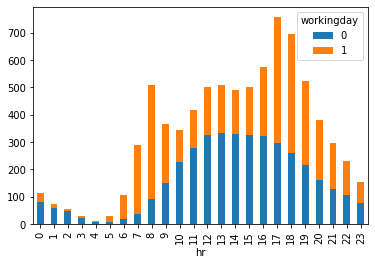

In [5]:
tbl.plot(kind = 'bar', stacked = True);

### Shows us hourly distribution of count of rented bikes. 
- In the hours 0-6, when people will be sleeping, we have low amount of rented bikes. 
- Around 7th to 9th hour and 17th to 19th hour, we see a hike in the number of biked rented. This would be the hours when people go and come back from work on a working day.

In [6]:
# Based on the Data Exploration of HR and Average Bikes rented, we will be dividing the dataset into 5 categories

train['hr_bins'] = pd.cut(train.hr, [-1, 6, 9, 16, 19, 24],
                          labels = ['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])

# -1 to 6    ==   0 to 6     == Late_Night         greater than -1 to less than equal to 6 
#  6 to 9    ==   7 to 9     == Office_Going       greater than 6 to less than equal to 9 
#  9 to 16   ==   10 to 16   == Mid_Day            greater than 9 to less than equal to 16
#  16 to 19  ==   17 to 19   == Office_Returning   greater than 16 to less than equal to 19
#  19 to 24  ==   20 to 24   == Night              greater than 19 to less than equal to 24

train[['hr', 'hr_bins']][:24]

,hr,hr_bins
0,0,Late_Night
1,1,Late_Night
2,2,Late_Night
3,3,Late_Night
4,4,Late_Night
5,5,Late_Night
6,6,Late_Night
7,7,Office_Going
8,8,Office_Going
9,9,Office_Going


# Dummy Creation

In [7]:
display (train.head())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_bins
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Late_Night
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Late_Night
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Late_Night
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Late_Night
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Late_Night


In [8]:
train.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [9]:
train.shape

(13035, 17)

In [12]:
# pd.get_dummies(train['weekday']) # df
# pd.get_dummies(train['weekday'], prefix = 'weekday')
pd.get_dummies(train['weekday'], prefix = 'weekday', drop_first = True) # df

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
13030,1,0,0,0,0,0
13031,1,0,0,0,0,0
13032,1,0,0,0,0,0
13033,1,0,0,0,0,0


In [13]:
train = train.join(pd.get_dummies(train['weekday'], prefix = 'weekday', drop_first = True))
train.head()

# pd.get_dummies(train['weekday']- creating the dummies for weekday variable
# train.join - adding the dummy df to the train df
# prefix = 'weekday' - colname prefix of weekday - we can recognize the dummy is for which col
# drop_first = True - drop the first dummy column

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,hr_bins,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,1,0,1,0,0,6,0,1,0.24,...,3,13,16,Late_Night,0,0,0,0,0,1
1,2,1,0,1,1,0,6,0,1,0.22,...,8,32,40,Late_Night,0,0,0,0,0,1
2,3,1,0,1,2,0,6,0,1,0.22,...,5,27,32,Late_Night,0,0,0,0,0,1
3,4,1,0,1,3,0,6,0,1,0.24,...,3,10,13,Late_Night,0,0,0,0,0,1
4,5,1,0,1,4,0,6,0,1,0.24,...,0,1,1,Late_Night,0,0,0,0,0,1


In [14]:
train.shape

(13035, 23)

# One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
train.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [23]:
ohe = OneHotEncoder(categories = 'auto', sparse = False, dtype = int, drop='first')
# ‘auto’ : Determine categories automatically from the data
ohe.fit(train[["mnth"]])

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(train[["mnth"]]), columns=ohe.get_feature_names_out())
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

train = get_ohe(train)
train

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,1,0,1,0,0,6,0,1,0.24,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,1,0,6,0,1,0.22,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,2,0,6,0,1,0.22,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,3,0,6,0,1,0.24,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,4,0,6,0,1,0.24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13030,13031,3,1,7,3,0,1,1,2,0.72,...,0,0,0,0,1,0,0,0,0,0
13031,13032,3,1,7,4,0,1,1,2,0.72,...,0,0,0,0,1,0,0,0,0,0
13032,13033,3,1,7,5,0,1,1,2,0.72,...,0,0,0,0,1,0,0,0,0,0
13033,13034,3,1,7,6,0,1,1,1,0.70,...,0,0,0,0,1,0,0,0,0,0


## Advantages of Pandas get_dummies() function over Scikit-learn OneHotEncoder() function

    The get_dummies() function returns encoded data with variable names. We can also add prefixes to dummy variables in each categorical variable name.
    The get_dummies() function returns the entire dataset with numerical variables also.

## Advantages of dummy encoding over one-hot encoding

    Both expand the feature space (dimensionality) in your dataset by adding dummy variables. However, dummy encoding adds fewer dummy variables than one-hot encoding does.
    Dummy encoding removes a duplicate category in each categorical variable. This avoids the dummy variable trap.

# Label Encoder

In [25]:
train['hr_bins'].unique()

['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night']
Categories (5, object): ['Late_Night' < 'Office_Going' < 'Mid_Day' < 'Office_Returning' < 'Night']

In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
train['hr_bins'] = label_encoder.fit_transform(train['hr_bins'])
train['hr_bins'].unique()

array([0, 3, 1, 4, 2])

One **advantage** of label encoding is that it does not expand the feature space at all as we just replace category names with numbers. Here, we do not use dummy variables.

The major **disadvantage** of label encoding is that machine learning algorithms may consider there may be relationships between the encoded categories.

In [30]:
list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))

['Late_Night', 'Mid_Day', 'Night', 'Office_Going', 'Office_Returning']